**Introduction**
================

**_Poonam Ligade_**

*9th Feb 2017*

In this competition we are trying to classify interest levels of rental listings into high , low or medium.

In this mainly we will look at data exploration and visulization part

EDA is often most tedious and boring job.

But the more time you spend here on understanding, cleaning and preparing data the better fruits your predictive model will bare!!

Lets start.

1) **Introduction**

  1. Import Libraries
  2. Load data
  3. Variable Identification
  4. Run Statistical summaries
  5. Correlations

2) **Visualisation**

 1. Univariate Analysis
 2. Bivariate Analysis


3) **Feature engineering**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(font_scale=1)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
plt.style.use("fivethirtyeight")

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [7]:
train = pd.read_json("data/train.json")
train.head()

test = pd.read_json("data/test.json")

print("Train Set shape: {}".format(train.shape))
print("Test Set shape: {}".format(test.shape))

Train Set shape: (49352, 15)
Test Set shape: (74659, 14)


**Variable Identification**
---------------------------

In [8]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [9]:
#How many columns with different datatypes are there?
train.get_dtype_counts()

float64    3
int64      3
object     9
dtype: int64

In [10]:
##Describe gives statistical information about numerical columns in the dataset
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


**Visualization**
=========================

**Latitude and Longitude using Google Earth**
---------------------------------------------------------

In [12]:
import gpxpy as gpx
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():
    #print (row['latitude'], row['longitude'])

    if row['interest_level'] == 'high': #opting for all nominals results in poor performance of Google Earth
        gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)
        gpx.waypoints.append(gps_waypoint)
        
filename = "GoogleEarth.gpx"
FILE = open(filename,"w")
FILE.writelines(gpx.to_xml())
FILE.close()

credits to this [kernel][1]

On  Google Earth high level interest rental listing looks like this.
![Listings][2]


  [1]: https://www.kaggle.com/justindeed/two-sigma-connect-rental-listing-inquiries/google-earth-exploration/
  [2]: http://i.imgur.com/9mXpYrL.jpg

**Wordcloud for text data**
---------------------------

In [13]:
#Preprocessing
from wordcloud import WordCloud
text = ''
text_dispadd = ''
text_street = ''
text_desc =''
for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_dispadd = " ".join([text_dispadd,"_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street, row['street_address']])
    text_desc=" ".join([text_desc, row['description']])
text = text.strip()
text_dispadd = text_dispadd.strip()
text_street = text_street.strip()
text_desc = text_desc.strip()

KeyboardInterrupt: 

**Display Address**
-------------------

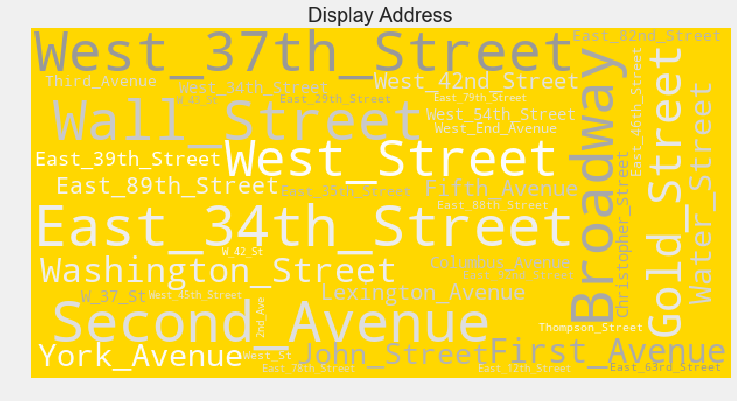

In [14]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='gold', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_dispadd)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("Display Address", fontsize=20)
plt.axis("off")
plt.show();

**Features**
------------

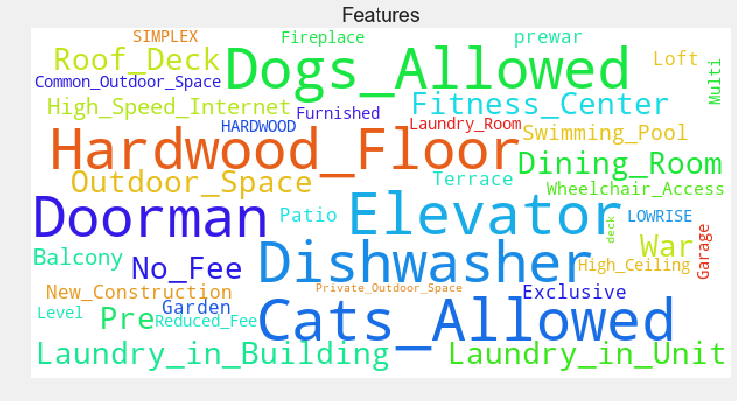

In [15]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Features", fontsize=20)
plt.axis("off")
plt.show()

**Street Address**
------------------

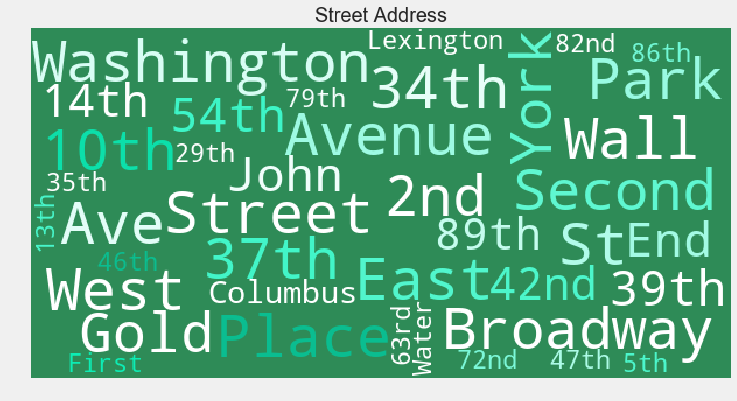

In [16]:
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(165, 90%%, %d%%)" % random.randint(39, 145)


# wordcloud for street address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='seagreen', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_street)
wordcloud.recolor(color_func=green_color_func, random_state=8)
plt.imshow(wordcloud)
plt.title("Street Address", fontsize=20)
plt.axis("off")
plt.show()

**Description**
===============

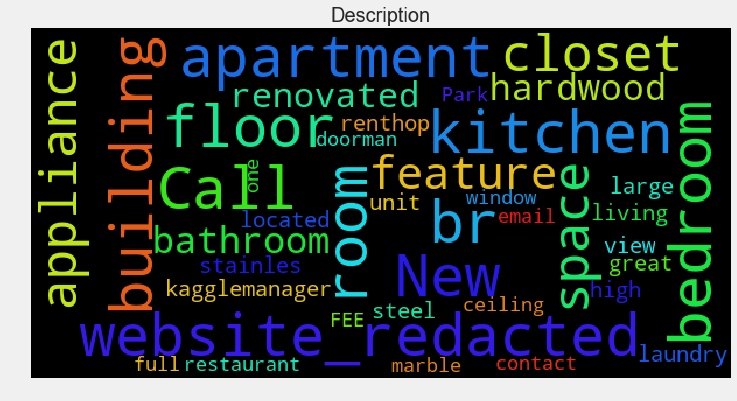

In [17]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='black', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_desc)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Description", fontsize=20)
plt.axis("off")
plt.show()

*Interest Level*
----------------

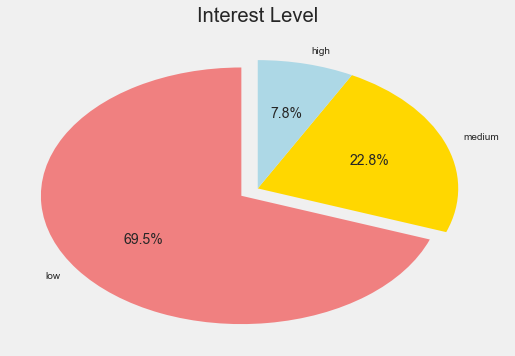

In [18]:
#target variable
labels = ["low","medium","high"]
sizes = train.interest_level.value_counts().values
explode=[0.1,0,0]
colors = [  'lightcoral','gold','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

Very few listings are with high interest.

*Price*
-------

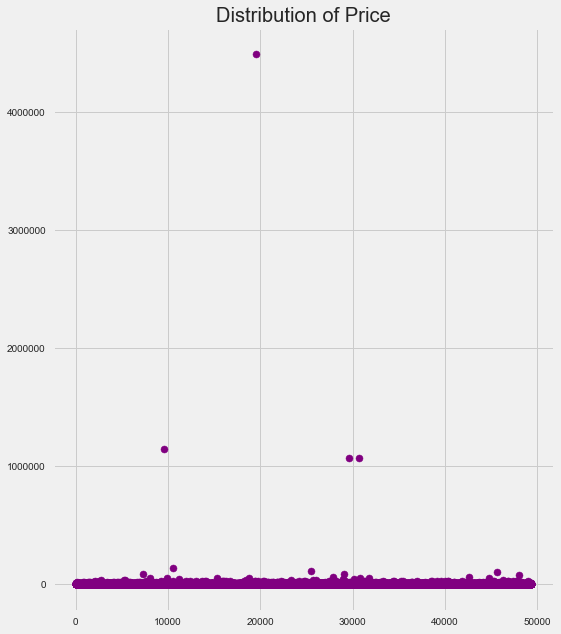

In [19]:
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");

Looks like there are some outliers in price, column ,lets remove them first.

/Users/manabchetia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



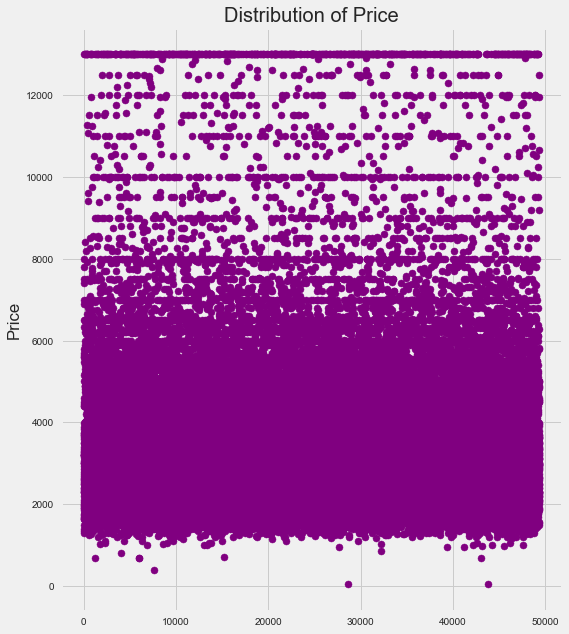

In [20]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit


plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.ylabel("Price")
plt.title("Distribution of Price");

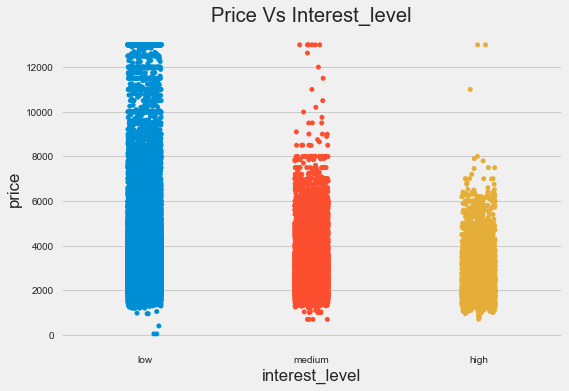

In [21]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

*Number of BedRooms*
--------------------

/Users/manabchetia/anaconda/lib/python3.6/site-packages/pandas/tools/plotting.py:983: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



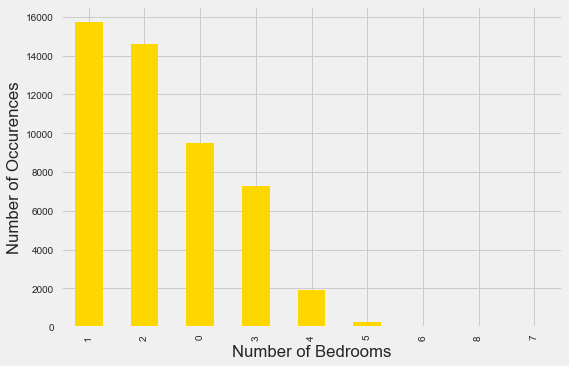

In [22]:
train["bedrooms"].value_counts().plot(kind='bar',colors='gold')
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Bedrooms");

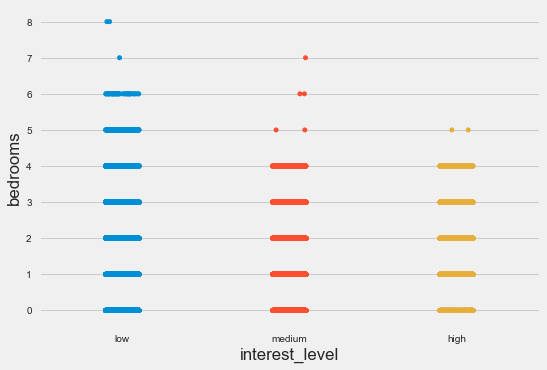

In [23]:
sns.stripplot(y="bedrooms", x="interest_level",data=train,jitter=True,order=order);

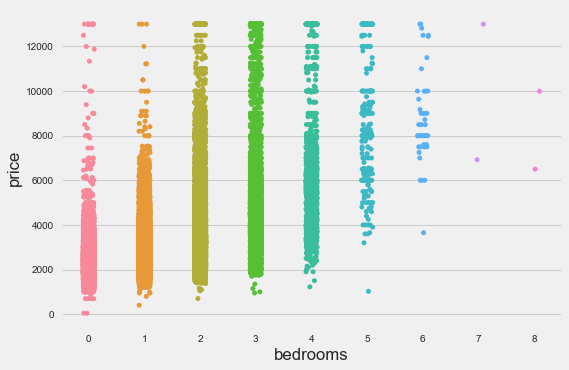

In [24]:
sns.stripplot(x="bedrooms", y="price",data=train,jitter=True);

*Number of BathRooms*
---------------------

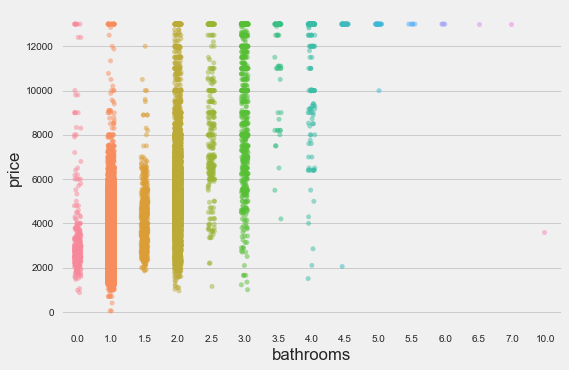

In [25]:
sns.stripplot(x="bathrooms", y="price"
              ,data=train, alpha=.5,jitter=True);

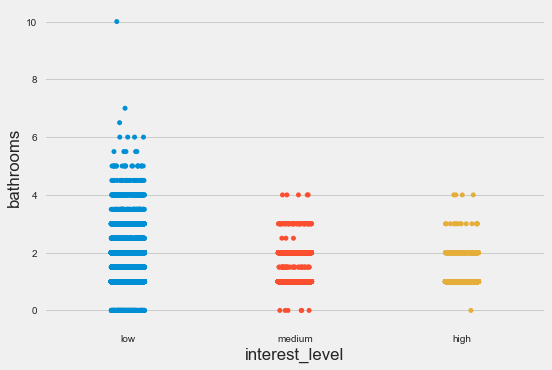

In [26]:
sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order=order);

There is 1 house listing with 10 bathrooms. I think we can treat that as outlier. 
Lets remove it and plot again.

In [27]:
ulimit = np.percentile(train.bathrooms.values, 99)
train['bathrooms'].ix[train['bathrooms']>ulimit] = ulimit

/Users/manabchetia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



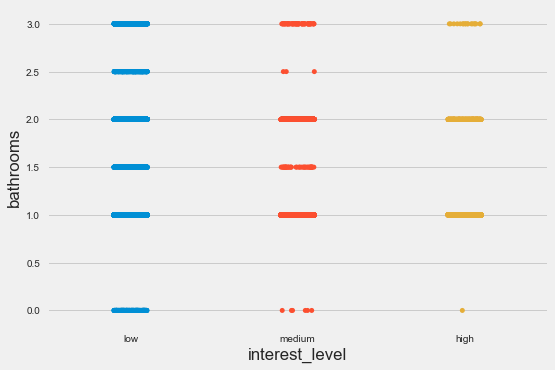

In [28]:

sns.stripplot(y="bathrooms", x="interest_level",data=train,jitter=True,order=order);

**Listing Id**
==============

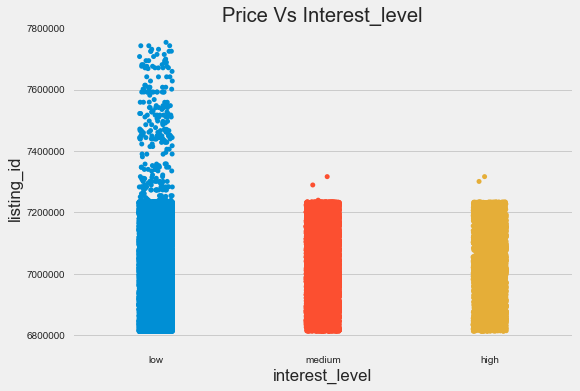

In [29]:
sns.stripplot(train["interest_level"],train["listing_id"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

Above certain value of listing ID interest is extremely low. Borrowed from this [kernel][1]


  [1]: https://www.kaggle.com/zeroblue/two-sigma-connect-rental-listing-inquiries/visualizing-listing-id-vs-interest-level

**Feature engineering**
=======================

**Aggregate on Text data**
--------------------------

In [30]:
train['num_photos'] = train['photos'].apply(len)
train['num_features'] = train['features'].apply(len)
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['num_description_len'] = train['description'].apply(len)

**Breaking created date column**
--------------------------------

In [31]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.date
train["year"] = train["created"].dt.year
train['month'] = train['created'].dt.month
train['day'] = train['created'].dt.day
train['hour'] = train['created'].dt.hour
train['weekday'] = train['created'].dt.weekday
train['week'] = train['created'].dt.week
train['quarter'] = train['created'].dt.quarter
train['weekend'] = ((train['weekday'] == 5) & (train['weekday'] == 6))
train['wd'] = ((train['weekday'] != 5) & (train['weekday'] != 6))

**Dates**
-------

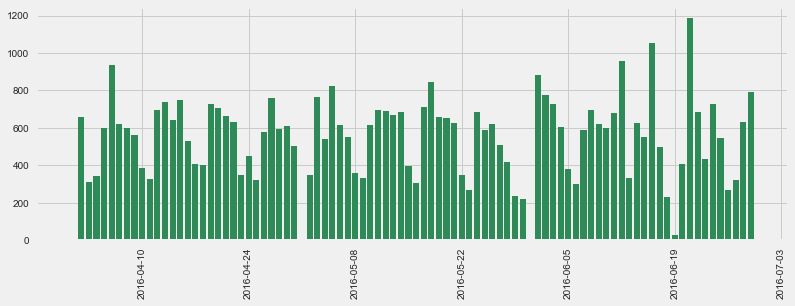

In [32]:
cnt_srs = train['date'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, color='seagreen')
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

All listings have been created in April to July 2016 period in our data.

**Hour**
------

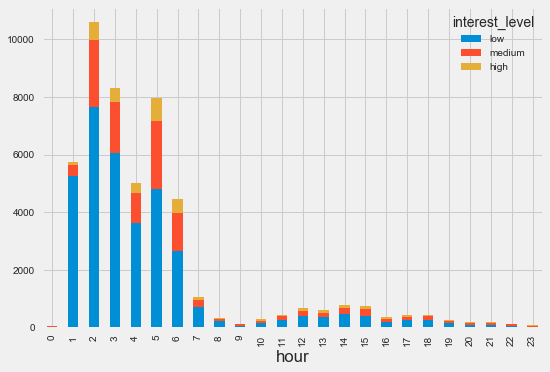

In [33]:
hourDF = train.groupby(['hour', 'interest_level'])['hour'].count().unstack('interest_level').fillna(0)
hourDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

**Month**
-------

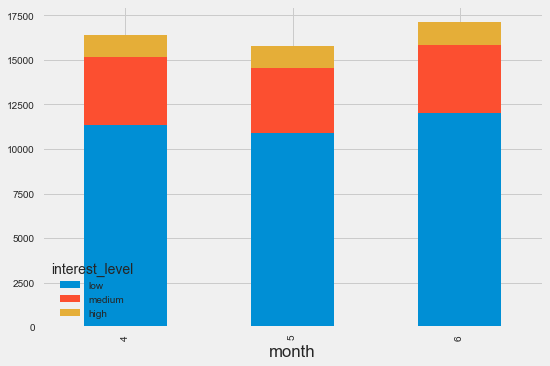

In [34]:
monthDF = train.groupby(['month', 'interest_level'])['month'].count().unstack('interest_level').fillna(0)
monthDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

**Photos**
--------

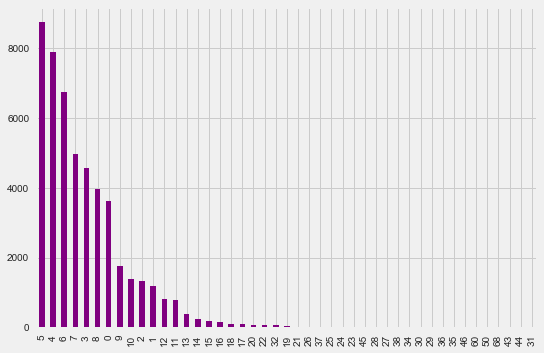

In [35]:
train.num_photos.value_counts().plot(kind='bar',color='purple')

/Users/manabchetia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



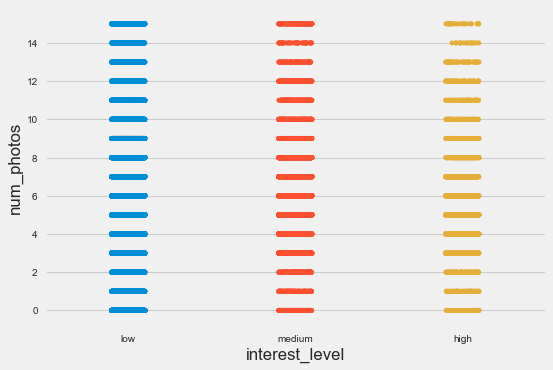

In [36]:
train['num_photos'].ix[train['num_photos']>15] = 15
sns.stripplot(y="num_photos", x="interest_level",data=train,jitter=True,order=order);

Data is evenly distributed across interest levels

*Features*
----------

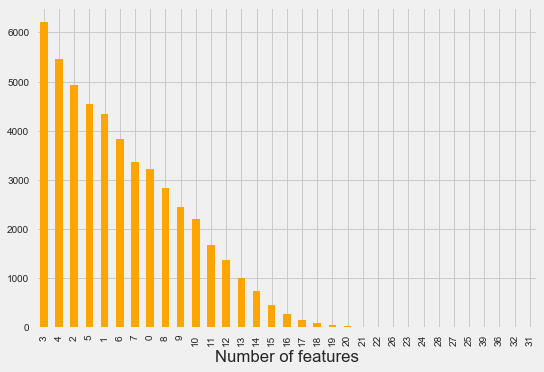

In [37]:
train.num_features.value_counts().plot(kind='bar',color='orange')
plt.xlabel("Number of features")

/Users/manabchetia/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



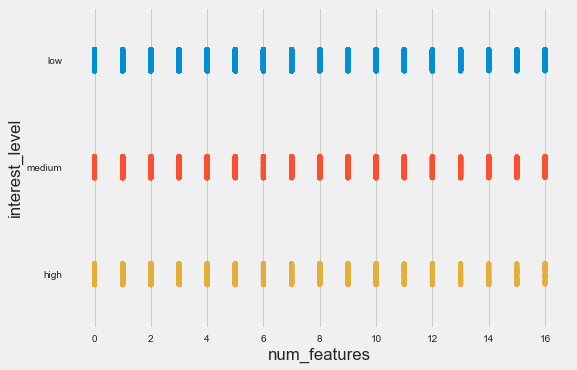

In [38]:
train['num_features'].ix[train['num_features'] > 16] = 16
sns.stripplot(x="num_features", y="interest_level",data=train,jitter=True,order=order);

Data is evenly distributed across all levels

**High profile Managers**
--------------------

In this I have tried to find top managers with more than 80 listings altogether with low,medium or high interest levels and more than 30 listings with high interest levels.

/Users/manabchetia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



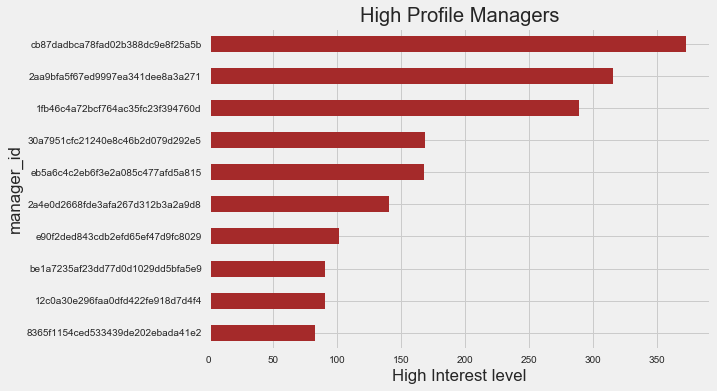

In [39]:
managerDF = train.groupby(['manager_id', 'interest_level'])['manager_id'].count().unstack('interest_level').fillna(0)
managerDF["sum"]=managerDF.sum(axis=1)
x=managerDF[ (managerDF['sum'] > 80) & (managerDF['high'] > 30)]
managerDF.head()
x.sort_values("sum",inplace=True)
plt.title("High Profile Managers")
plt.xlabel("High Interest level")
plt.ylabel("Manager ID")
x = x[x.index != 'e6472c7237327dd3903b3d6f6a94515a']
x["sum"].plot(kind='barh',color="brown");

**High profile Buildings**
=====================

In this I have tried to find top buildings with more than 60 listings altogether with low,medium or high interest levels and more than 15 listings with high interest levels.

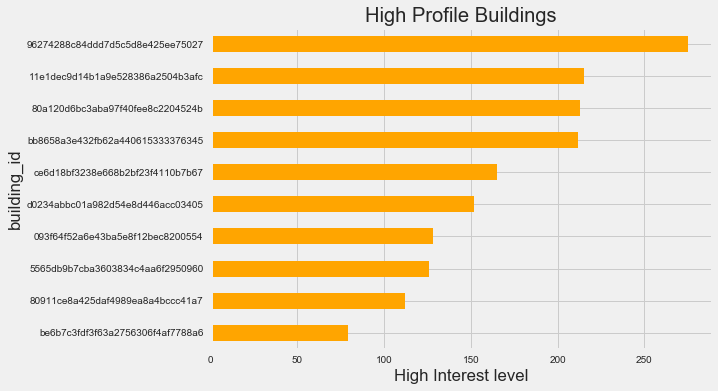

In [40]:
buildingDF = train.groupby(['building_id', 'interest_level'])['building_id'].count().unstack('interest_level').fillna(0)
buildingDF["sum"]=buildingDF.sum(axis=1)
x=buildingDF[ (buildingDF['sum'] > 60) & (buildingDF['high'] > 15)]
buildingDF.head()
#removing the outlier
x = x[x.index != '0']
x.sort_values("sum",inplace=True)
plt.title("High Profile Buildings")
plt.xlabel("High Interest level")
plt.ylabel("Building ID")
x["sum"].plot(kind='barh',color="orange");

**BedRooms , Bathrooms, Features , Price and Interest level all together**
-----------------------------------------------------------------------

In [41]:
hover_text = []
bubble_size = []
slope = 2.8
for index, row in train.iterrows():
    hover_text.append(('Interest: {interest}<br>'+
                      'Bedrooms: {bedrooms}<br>'+
                      'Price: {price}<br>'+
                      'Bathrooms: {bathrooms}<br>'+
                      'Year: {year}').format(interest=row['interest_level'],
                                            bedrooms=row['bedrooms'],
                                            price=row['price'],
                                            bathrooms=row['bathrooms'],
                                            year=row['created']))
    bubble_size.append(len(row['features'])*slope)

train['text'] = hover_text
train['bubble_size'] = bubble_size

In [42]:
trace0 = go.Scatter(
    y=train['bedrooms'][train['interest_level'] == 'low'],
    x=train['price'][train['interest_level'] == 'low'],
    mode='markers',
    name='low',
    text=train['text'][train['interest_level'] == 'low'],
    marker=dict(
        sizemode='diameter',
        sizeref=0.85,
        size=train['bubble_size'][train['interest_level'] == 'low'],
        line=dict(
            width=2
        ),
    )
)

trace1 = go.Scatter(
    y=train['bedrooms'][train['interest_level'] == 'medium'],
    x=train['price'][train['interest_level'] == 'medium'],
    mode='markers',
    name='medium',
    text=train['text'][train['interest_level'] == 'medium'],
   marker=dict(
        sizemode='diameter',
        sizeref=0.85,
        size=train['bubble_size'][train['interest_level'] == 'medium'],
        line=dict(
            width=2
        ),
    )
)

trace2 = go.Scatter(
    y=train['bedrooms'][train['interest_level'] == 'high'],
    x=train['price'][train['interest_level'] == 'high'],
    mode='markers',
    name='high',
    text=train['text'][train['interest_level'] == 'high'],
    marker=dict(
        sizemode='diameter',
        sizeref=0.85,
        size=train['bubble_size'][train['interest_level'] == 'high'],
        line=dict(
            width=2
        ),
    )
)

data = [trace0,trace1,trace2]

layout = go.Layout(
    title='Number of Bedrooms vs Price',
    xaxis=dict(
        title='Price (in dollars)',
        gridcolor='rgb(255, 255, 255)',
        range=[2.003297660701705, 5.191505530708712],
        type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Number of Bedrooms',
        gridcolor='rgb(255, 255, 255)',
        range=[0.12621671352166, 8.72921793264332],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig = dict(data=data, layout=layout)
iplot(fig, filename='bubblechart-color')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


More to come. Please upvote if you find it useful.